# Support Vector Machine (SVM)
Using only numpy
Based on [CS229](https://www.youtube.com/watch?v=lDwow4aOrtg) and [CS229](https://www.youtube.com/watch?v=8NYoQiRANpg), [ML Mastery](https://www.youtube.com/watch?v=bxGceB5Eq1c), [Visually Explained](https://www.youtube.com/watch?v=Q7vT0--5VII), [link](https://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/).
> A *support vector machine* can perform binary classification and regression tasks. It uses a hyperplane to separate the data into classes.
> The *hyperplane* is chosen to maximize the margin between the classes (maximum margin separators).
> *Support vectors* are the data points that are closest to the hyperplane and used to determine the hyperplane.

## Notation
- Hypothesis: $$h_{w,b}(x) = g(w^Tx + b)$$
- Labels: $y \in \{-1, 1\}$
- $h$ output values in $\{-1, 1\}$
- $g(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ -1 & otherwise \end{cases}$ (logistic function)
- $w$ is the weight vector without bias, as bias explicitly added as $b$
- $w^Tx + b$ is the decision boundary
- $g$ is the activation function (logistic function)
- $\gamma$ is the geometric margin
- $\hat{\gamma}$ is the functional margin
- $\phi$ is the feature mapping function $\phi: \mathbb{R}^n \rightarrow \mathbb{R}^m$ (maps the data from the input space to a higher dimensional feature space)
- $\langle x,z \rangle$ is the inner product of $x$ and $z$: $x^Tz$

## Hyperplane
- It is always of one dimension less than the data: 2D data -> 1D line, 3D data -> 2D plane, 4D data -> 3D plane, etc.
- Functional margin of hyperplane defined by $(w, b)$ with respect to training example $(x^{(i)}, y^{(i)})$: $$\hat{\gamma}^{(i)} = y^{(i)}(w^Tx^{(i)} + b)$$
- Desired properties:
    - $y^{(i)} = 1$, want $w^Tx^{(i)} + b >> 1$ (want the result to be large and positive)
    - $y^{(i)} = -1$, want $w^Tx^{(i)} + b << -1$ (want the result to be large and negative)
- If $\hat{\gamma}^{(i)} > 0$, then $h(x^{(i)}) = y^{(i)}$ (as long as the functional margin is greater than 0, the prediction is correct)
- Functional margin with respect to the training set: $\hat{\gamma} = \min_{i=1,...,m} \hat{j}^{(i)}$ (the smallest functional margin of any of the training examples -> how well the hyperplane separates the data over the entire training set)
- Geometric margin of hyperplane defined by $(w, b)$ with respect to training example $(x^{(i)}, y^{(i)})$: $\gamma^{(i)} = (\frac{w^Tx^{(i)} + b}{\vert \vert w \vert \vert}) = \frac{\hat{\gamma}^{(i)}}{\vert \vert w \vert \vert}$ (the functional margin divided by the Euclidean norm of w)
- Geometric margin with respect to the training set: $\gamma = \min_{i=1,...,m} \gamma^{(i)}$ (smallest geometric margin of any of the training examples)

## Optimal margin classifier
- Choose the parameters $w$ and $b$ to maximize $\gamma$ (the geometric margin)
- $max_{w, b, \gamma} \gamma$ subject to $\hat{\gamma}^{(i)} \frac{w^Tx^{(i)} + b}{\vert \vert w \vert \vert} \geq \gamma$ for $i = 1, ..., m$ (the functional margin of any training example must be greater than or equal to the geometric margin)
- Can be reformulated to a equivalent problem: $min_{w, b} \vert \vert w \vert \vert^2$ subject to $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$ (minimize the euclidean norm of w, subject to the functional margin of any training example being greater than or equal to 1)
- Raising the geometric margin is the same as lowering the euclidean norm of w

When the $min_i \gamma^{(i)}$ shall be as large as possible, one possible way is to raise $\gamma^{(i)} \geq \gamma$ for all $i$ (the geometric margin of any training example must be greater than or equal to the geometric margin of the entire training set) --> maximizing the geometric margin has the effect of maximizing the worst case geometric margin

Scaling the length of the vectors by a constant factor does not change their direction.
--> If $\vert \vert w \vert \vert$ is scaled such that it is equal to $\frac{1}{\gamma}$,
the optimization problem becomes $max \frac{1}{\vert \vert w \vert \vert}$ subject to $y^{(i)}(w^Tx^{(i)} + b) \gamma \geq \gamma$ = $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ (maximize the length of w, subject to the functional margin of any training example being greater than or equal to 1)
This is equal to $min \frac{1}{2} \vert \vert w \vert \vert^2$ subject to $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ (minimize the euclidean norm of w, subject to the functional margin of any training example being greater than or equal to 1)

## Support Vector Machine (SVM)
- **Optimal margin classifier + kernel trick (non-linear classification) = support vector machine**
    - The optimal margin classifier is a *quadratic programming problem* (can be solved efficiently)
    - The *support vector machine* is a *soft margin classifier* by applying the *kernel trick* (non-linear classification)

-  Represented theorem: Suppose $w = \sum_{i=1}^m \alpha_i x^{(i)}$ (w can be represented as a linear combination of the training examples)
    - Why?
        - Intuition 1: In logistic regression, the on every iteration the weights are updated by adding the product of the learning rate and the gradient of the cost function with respect to the weights. --> The weights are a linear combination of the training examples.
        - Intuition 2: ([video](https://www.youtube.com/watch?v=8NYoQiRANpg&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=7) at 16:00)

Then $min_{w, b} \frac{1}{2} \vert \vert w \vert \vert^2$ subject to $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$ is equivalent to: $min_{\alpha} \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)T} x^{(j)} - \sum_{i=1}^m \alpha_i$ subject to $\alpha_i \geq 0$ for $i = 1, ..., m$ and $\sum_{i=1}^m \alpha_i y^{(i)} = 0$.

Plug $w = \sum_{i=1}^m \alpha_i x^{(i)}$ into $min_{w, b} \frac{1}{2} \vert \vert w \vert \vert^2$ subject to $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$: $min \frac{1}{2}(\sum_{i=1}^m \alpha_iy^{(i)}x^{(i)})^T(\sum_{j=1}^m \alpha_jy^{(j)}x^{(j)})$ = $min \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)T} x^{(j)}$
The constraint becomes $y^{(i)}(\sum_{j=1}^m \alpha_jy^{(j)}x^{(j)})^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$.

The optimization Problem can be simplified into the *Dual optimization problem*: $\sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j y^{(i)} y^{(j)} \alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle$ subject to $\alpha_i \geq 0$ for $i = 1, ..., m$ and $\sum_{i=1}^m \alpha_i y^{(i)} = 0$.
--> Solve for $\alpha_i$'s instead of $w$ and $b$.
--> Make predictions using $w = \sum_{i=1}^m \alpha_i x^{(i)}$. --> $h_{w,b}(x) = g(w^Tx + b) = g((\sum_{i=1}^m \alpha_i x^{(i)})^Tx + b) = g(\sum_{i=1}^m \alpha_i \langle x^{(i)}, x \rangle + b)$
- *Kernel trick*:
    - Write algorithm in terms of $\langle x^{(i)}, x^{(j)} \rangle$ (or $\langle x, z \rangle$ instead of $x^{(i)}$ and $x^{(j)}$.
    - Let there be some mapping from $x \rightarrow \phi(x)$.
    - Find way to compute $K(x, z) = \phi(x)^T \phi(z)$ without explicitly computing $\phi(x)$ and $\phi(z)$.
    - Replace $\langle x, z \rangle$ with $K(x, z)$.

$K(x,z) = \phi(x)^T \phi(z) = (x^Tz)^2$ 

Proof: $(x^Tz)^2 = (\sum_{i=1}^n x_iz_i) (\sum_{i=1}^n x_iz_i) = \sum_{i=1}^n \sum_{j=1}^n x_iz_iix_jz_j = \sum_{i=1}^n \sum_{j=1}^n (x_ix_j)(z_iz_j)$ Go through every i and j and compute $x_ix_j$ and $z_iz_j$ and add them up. --> $K(x,z) = \phi(x)^T \phi(z)$
Needs O(n) time to compute $(x^Tz)^2$ instead of O(n^2) time to compute $\phi(x)^T \phi(z)$.

##### Examples of kernels
$K(x,z) = (x^Tz+c)^2$ where c is a constant $c \in \mathbb R$. This corresponds to adding a feature to every example. --> \begin{bmatrix} x_1 & x_1 \\ x_1 & x_2 \\ ... & ... \end{bmatrix} --> \begin{bmatrix} x_1 & x_1 \\ x_1 & x_2 \\ ... & ...\\ \sqrt{2c} & x_1 \\ \sqrt{2c} & x_2 \\ ... & ... \end{bmatrix}
$K(x,z) = (x^Tz+c)^d$ O(n) time $\phi(x)$ has all \begin{pmatrix} n+d-1 \\ d \end{pmatrix} features of polynomial of up to degree d.

##### Kernels 
- Kernel properties
    - If $x, z$ are "similar", $K(x,z) = \phi(x)^T \phi(z)$ should be large. (Point in similar direction)
    - If $x, z$ are "dissimilar", $K(x,z) = \phi(x)^T \phi(z)$ should be small. (Point in dissimilar directions)
- Kernel functions
    - A function can be used as a kernel function if there exists a mapping $\phi$ such that $K(x,z) = \phi(x)^T \phi(z)$. 
    - Linear Kernel: $K(x,z) = x^Tz$ $\phi(x) = x$
    - Gaussian Kernel: $K(x,z) = exp(-\frac{\vert \vert x-z \vert \vert^2}{2 \sigma^2})$ 
    - Constraints on $K$ to be a valid kernel function:
        - $K(x,z) = \phi(x)^T\phi(x) \geq 0$ for all $x,z$
        - Theorem (Mercer): $K$ is a valid kernel function (i.e. $\exists \phi$ s.t. $K(x,z) = \phi(x)^T \phi(z)$) iff $K$ is symmetric and $K$ is positive semidefinite for any $d$ points.
            - Let $\{x^{(1)}, ..., x^{(d)}\}$ be $d$ points
            - Let $K \in R^{d \times d}$ be the kernel matrix where $K_{ij} = K(x^{(i)}, x^{(j)})$ (Kernel function applied to all pairs of points)
            - Given any vector $z$, $z^TKz = \sum_i \sum_j z_ik_{ij}z_j = \sum_i \sum_j z_i \phi (x^{(i)})^T \phi (x^{(j)}) z_j = \sum_i \sum_j z_i \sum_k (\phi (x^{(i)}))_k (\phi (x^{(j)}))_k z_j = \sum_k (\sum_i z_i (\phi (x^{(i)}))_k)^2 \geq 0$ (Because it is a sum of squares) --> **$K$ is positive semidefinite.**

##### $L_1$ norm soft margin SVM
- Normal SVM: $min_{w, b} \frac{1}{2} \vert \vert w \vert \vert^2$ s.t. $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$ (maximize margin subject to constraint that all points are on the correct side of the functional margin)
- $L_1$ norm soft margin SVM: $min_{w, b, \epsilon} \frac{1}{2} \vert \vert w \vert \vert^2 + C \sum_{i=1}^m \vert \epsilon_i \vert$ s.t. $y^{(i)}(w^Tx^{(i)} + b) \geq 1 - \epsilon_i$ and $\epsilon_i \geq 0$ for $i = 1, ..., m$ (maximize margin subject to constraint that all points are on the correct side of the functional margin and some points are allowed to be on the wrong side of the functional margin)
- --> *relaxed constraint*: Wrong side of the functional margin / too close to the functional margin is allowed to some extent
- Hyperparameter C: How much you want to penalize the points that are on the wrong side of the functional margin / too close to the functional margin

$max \sum_{i=1}^m \alpha_i - \sum_{i=1}^m\sum_{j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle$ s.t.  $\sum_{i=1}^m y^{(i)} \alpha_i  = 0$ and $C \geq \alpha_i \geq 0$ for $i = 1, ..., m$ (maximize margin subject to constraint that all points are on the correct side of the functional margin and some points are allowed to be on the wrong side of the functional margin) ($C \geq \alpha_i \geq 0$ for $i = 1, ..., m$ is the relaxed constraint)

# Principles
## Duality
Resource: [link](https://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/)
>In mathematical optimization theory, duality means that optimization problems may be viewed from either of two perspectives, the primal problem or the dual problem (the duality principle). The solution to the dual problem provides a lower bound to the solution of the primal (minimization) problem. ~ Wikipedia

In SVM's, minimiizing the primal problem is equivalent to maximizing the dual problem. The dual problem is easier to solve because it is a quadratic programming problem (i.e. a convex optimization problem).
Primal problem: $min_{w, b} \frac{1}{2} \vert \vert w \vert \vert^2$ s.t. $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$ 
Dual problem: $max \sum_{i=1}^m \alpha_i - \sum_{i=1}^m\sum_{j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle$ s.t.  $\sum_{i=1}^m y^{(i)} \alpha_i  = 0$ and $C \geq \alpha_i \geq 0$ for $i = 1, ..., m$ 

## Lagrange multiplier
Resource: [link](https://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/)
> In mathematical optimization, the method of Lagrange multipliers is a strategy for finding the local maxima and minima of a function subject to equality constraints. ~ Wikipedia
*Lagrangian function*: $L(w, b, \alpha) = f(w,b)-\alpha(g(w,b)-c)$ 
- $f$ objective function
- $g$ constraint function
- $c$ constraint value
- $\alpha$ is the *Lagrange multiplier*, a coefficient used to find the maxima / minima of a function s.t. constraints
Objective: Find $w, b, \alpha$ so that $\Delta L = 0$ (i.e. $L$ is at a local maxima / minima, because the derivative of a function at a local maxima / minima is 0)
Take derivative w.r.t $\alpha$: $\frac{\partial L}{\partial \alpha} = 0 - (g(w,b)-c) = 0$ --> $g(w,b) = c$ (i.e. constraint is satisfied)
Take derivative w.r.t $w$: $\frac{\partial L}{\partial w} = 0 - \alpha \frac{\partial g}{\partial w} = 0$ --> $\frac{\partial g}{\partial w} = 0$ (i.e. constraint is satisfied)
Take derivative w.r.t $b$: $\frac{\partial L}{\partial b} = 0 - \alpha \frac{\partial g}{\partial b} = 0$ --> $\frac{\partial g}{\partial b} = 0$ (i.e. constraint is satisfied)

## Multiple constraints
For $n$ constraints, there are $D+n$ unknowns e.g. $max_x f(x)$ s.t. $g_1(x) = 0$, $g_2(x) = ...$, $g_n(x)=0$
Lagrangian defined as: $L(x_1,..,x_D,\alpha_1,...,\alpha_n) = f(x_1,...,x_D) - \sum_{i=1}^n \alpha_i g_i(x_1,...,x_D)$


Tasks
- Make sure data points $x, y$ are classified correctly 
    - $y = 1 \rightarrow w^Tx + b \geq 1$ (Positive class must be on the positive side of the hyperplane)
    - $y = -1 \rightarrow w^Tx + b \leq -1$ (Negative class must be on the negative side of the hyperplane)
    - ---> (i.e. $y_i(w^Tx_i + b) \geq 1$ for all $i$) (Functional margin must be at least 1, which means that the distance between the hyperplane and the closest data points in each direction must be at least 1)
- Maximize the margin
    - $d = \frac{2}{\vert \vert w \vert \vert}$ (Margin to be maximized)
    - ---> Minimize $\vert \vert w \vert \vert$ (Minimize the euclidean norm of w has the same effect as maximizing the margin)
    - ---> Minimize $\frac{1}{2} \vert \vert w \vert \vert^2$
- Euclidean distance between point and hyperplane: $\frac{\vert w^Tx + b \vert}{\vert \vert w \vert \vert}$

- Kernel trick: Slide a kernel over the data points to see how data points relate to each other
    - Using the kernel trick, the margin is maximized by $\text max \sum_{i=1}^m \alpha_i - \sum_{i=1}^m\sum_{j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle$ s.t.  $\sum_{i=1}^m y^{(i)} \alpha_i  = 0$ and $C \geq \alpha_i \geq 0$ for $i = 1, ..., m$ (maximize margin subject to constraint that all points are on the correct side of the functional margin and some points are allowed to be on the wrong side of the functional margin) ($C \geq \alpha_i \geq 0$ for $i = 1, ..., m$ is the relaxed constraint)
    - $\alpha$ is a vector of Lagrange multipliers. Initialized with zeros.
    - $\langle x^{(i)}, x^{(j)} \rangle$ is the kernel applied to the data points $x^{(i)}$ and $x^{(j)}$
    - $C$ is a hyperparameter that determines how much you want to penalize the points that are on the wrong side of the functional margin / too close to the functional margin


from matplotlib import pyplot as plt
from typing import Tuple
import numpy as np


class OptimalMarginClassifier:
    x: np.ndarray
    y: np.ndarray

    support_vectors: np.ndarray
    w: np.ndarray
    b: float

    def __init__(self, x: np.ndarray, y: np.ndarray):
        self.x = x
        self.y = y
        self.w = np.zeros(x.shape[1])
        self.b = 1

    def learn(self, C: float = 1, epochs: int = 20, learning_rate: float = 0.001):
        """
        :param x: 
        :param C: Slack variable determines how much you want to penalize the points that are on the wrong side of the functional margin / too close to the functional margin
        :return: 
        """
        # Choose w, b and slack, such that: min {1 / 2 * ||w||^2 + C * sum slack_i} s.t. y_i(w^T x_i + b) >= 1 - slack_i
        history = []
        for epoch in range(0, epochs):
            support_vectors = []
            slack_list = []
            wrong_classified = 0
            for i in range(0, len(self.x)):
                # y_i * (w^T x_i + b)
                functional_margin = self.functional_margin(self.x[i], self.y[i])
                # y_i * (w^T x_i + b) / ||w||
                geometric_margin = functional_margin / np.linalg.norm(self.w)
                # max(0, 1 - y_i(w^T x_i + b))
                slack_i = self.slack(functional_margin)

                # y_i * (w^T x_i + b) >= 1 - slack_i
                if functional_margin >= 1 - slack_i:
                    # A functional margin >= 1 means that the data point is on the correct side of the functional margin (not closer than 1 to the hyperplane)
                    slack_list.append(slack_i)
                    # Minimize 1/2 * ||w||^2 + C * sum slack_i by adjusting w and b
                    # w = w - learning_rate * (w - C * y_i * x_i) corresponds to the derivative of 1/2 * ||w||^2
                    self.w = self.w - learning_rate * (self.w - C * self.y[i] * self.x[i])
                    # b = b - learning_rate * (0 - C * y_i) corresponds to the derivative of C * sum slack_i
                    self.b = self.b - learning_rate * (0 - C * self.y[i])
                    # Only add close support vectors to the support vectors
                    distance = self.distance_point_hyperplane(self.x[i])
                    if distance <= 1:
                        support_vectors.append(self.x[i])
                else:
                    wrong_classified += 1

            # 1/2 * ||w||^2 + C * sum slack_i
            loss = 0.5 * np.linalg.norm(self.w) ** 2 + C * np.sum(slack_list)
            print(f"Epoch {epoch}: Loss: {loss}")
            history.append(f"Loss: {loss:.2f}, Wrong classified: {wrong_classified}")
            # Update support vectors
            self.support_vectors = np.array(support_vectors)
        for entry in history:
            print(entry)

    def slack(self, functional_margin: np.ndarray):
        """
        :param functional_margin: The functional margin for the data point.
        :return: the slack: max(0, 1 - y_i(w^T x_i + b)). Describes how much the data point is on the wrong side of the functional margin.
        """
        return np.maximum(0, 1 - functional_margin)

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        :param x: Data points.
        :return: The labels for the given data points: sign(w^T x + b)
        """
        return np.sign(self.w.T @ x + self.b)

    def functional_margin(self, x: np.ndarray, y: float) -> np.ndarray:
        """
        :param x: Data point.
        :param y: Label.
        :return: The functional margin for a single data point: y * (w^T x + b)
        """
        return y * (self.w.T @ x + self.b)

    def distance_point_hyperplane(self, x: np.ndarray):
        """
        :param x: Single data point.
        :return: Euclidean distance between the point and the hyperplane: (w^T x + b) / ||w||
        """
        return self.w.T @ x + self.b / np.linalg.norm(self.w)

    def plot_decision_boundary(self):
        """
        Plots the decision boundary.
        """
        plt.scatter(self.x[:, 0], self.x[:, 1], c=self.y)
        plt.scatter(self.support_vectors[:, 0], self.support_vectors[:, 1], c="blue")
        plt.plot(self.support_vectors[:, 0], self.support_vectors[:, 1], c="blue")
        plt.show()#%% md
# Support Vector Machine (SVM)
Using only numpy
Based on [CS229](https://www.youtube.com/watch?v=lDwow4aOrtg) and [CS229](https://www.youtube.com/watch?v=8NYoQiRANpg), [ML Mastery](https://www.youtube.com/watch?v=bxGceB5Eq1c), [Visually Explained](https://www.youtube.com/watch?v=Q7vT0--5VII), [link](https://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/).
> A *support vector machine* can perform binary classification and regression tasks. It uses a hyperplane to separate the data into classes.
> The *hyperplane* is chosen to maximize the margin between the classes (maximum margin separators).
> *Support vectors* are the data points that are closest to the hyperplane and used to determine the hyperplane.

## Notation
- Hypothesis: $$h_{w,b}(x) = g(w^Tx + b)$$
- Labels: $y \in \{-1, 1\}$
- $h$ output values in $\{-1, 1\}$
- $g(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ -1 & otherwise \end{cases}$ (logistic function)
- $w$ is the weight vector without bias, as bias explicitly added as $b$
- $w^Tx + b$ is the decision boundary
- $g$ is the activation function (logistic function)
- $\gamma$ is the geometric margin
- $\hat{\gamma}$ is the functional margin
- $\phi$ is the feature mapping function $\phi: \mathbb{R}^n \rightarrow \mathbb{R}^m$ (maps the data from the input space to a higher dimensional feature space)
- $\langle x,z \rangle$ is the inner product of $x$ and $z$: $x^Tz$

## Hyperplane
- It is always of one dimension less than the data: 2D data -> 1D line, 3D data -> 2D plane, 4D data -> 3D plane, etc.
- Functional margin of hyperplane defined by $(w, b)$ with respect to training example $(x^{(i)}, y^{(i)})$: $$\hat{\gamma}^{(i)} = y^{(i)}(w^Tx^{(i)} + b)$$
- Desired properties:
    - $y^{(i)} = 1$, want $w^Tx^{(i)} + b >> 1$ (want the result to be large and positive)
    - $y^{(i)} = -1$, want $w^Tx^{(i)} + b << -1$ (want the result to be large and negative)
- If $\hat{\gamma}^{(i)} > 0$, then $h(x^{(i)}) = y^{(i)}$ (as long as the functional margin is greater than 0, the prediction is correct)
- Functional margin with respect to the training set: $\hat{\gamma} = \min_{i=1,...,m} \hat{j}^{(i)}$ (the smallest functional margin of any of the training examples -> how well the hyperplane separates the data over the entire training set)
- Geometric margin of hyperplane defined by $(w, b)$ with respect to training example $(x^{(i)}, y^{(i)})$: $\gamma^{(i)} = (\frac{w^Tx^{(i)} + b}{\vert \vert w \vert \vert}) = \frac{\hat{\gamma}^{(i)}}{\vert \vert w \vert \vert}$ (the functional margin divided by the Euclidean norm of w)
- Geometric margin with respect to the training set: $\gamma = \min_{i=1,...,m} \gamma^{(i)}$ (smallest geometric margin of any of the training examples)

## Optimal margin classifier
- Choose the parameters $w$ and $b$ to maximize $\gamma$ (the geometric margin)
- $max_{w, b, \gamma} \gamma$ subject to $\hat{\gamma}^{(i)} \frac{w^Tx^{(i)} + b}{\vert \vert w \vert \vert} \geq \gamma$ for $i = 1, ..., m$ (the functional margin of any training example must be greater than or equal to the geometric margin)
- Can be reformulated to a equivalent problem: $min_{w, b} \vert \vert w \vert \vert^2$ subject to $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$ (minimize the euclidean norm of w, subject to the functional margin of any training example being greater than or equal to 1)
- Raising the geometric margin is the same as lowering the euclidean norm of w

When the $min_i \gamma^{(i)}$ shall be as large as possible, one possible way is to raise $\gamma^{(i)} \geq \gamma$ for all $i$ (the geometric margin of any training example must be greater than or equal to the geometric margin of the entire training set) --> maximizing the geometric margin has the effect of maximizing the worst case geometric margin

Scaling the length of the vectors by a constant factor does not change their direction.
--> If $\vert \vert w \vert \vert$ is scaled such that it is equal to $\frac{1}{\gamma}$,
the optimization problem becomes $max \frac{1}{\vert \vert w \vert \vert}$ subject to $y^{(i)}(w^Tx^{(i)} + b) \gamma \geq \gamma$ = $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ (maximize the length of w, subject to the functional margin of any training example being greater than or equal to 1)
This is equal to $min \frac{1}{2} \vert \vert w \vert \vert^2$ subject to $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ (minimize the euclidean norm of w, subject to the functional margin of any training example being greater than or equal to 1)

## Support Vector Machine (SVM)
- **Optimal margin classifier + kernel trick (non-linear classification) = support vector machine**
    - The optimal margin classifier is a *quadratic programming problem* (can be solved efficiently)
    - The *support vector machine* is a *soft margin classifier* by applying the *kernel trick* (non-linear classification)

-  Represented theorem: Suppose $w = \sum_{i=1}^m \alpha_i x^{(i)}$ (w can be represented as a linear combination of the training examples)
    - Why?
        - Intuition 1: In logistic regression, the on every iteration the weights are updated by adding the product of the learning rate and the gradient of the cost function with respect to the weights. --> The weights are a linear combination of the training examples.
        - Intuition 2: ([video](https://www.youtube.com/watch?v=8NYoQiRANpg&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=7) at 16:00)

Then $min_{w, b} \frac{1}{2} \vert \vert w \vert \vert^2$ subject to $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$ is equivalent to: $min_{\alpha} \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)T} x^{(j)} - \sum_{i=1}^m \alpha_i$ subject to $\alpha_i \geq 0$ for $i = 1, ..., m$ and $\sum_{i=1}^m \alpha_i y^{(i)} = 0$.

Plug $w = \sum_{i=1}^m \alpha_i x^{(i)}$ into $min_{w, b} \frac{1}{2} \vert \vert w \vert \vert^2$ subject to $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$: $min \frac{1}{2}(\sum_{i=1}^m \alpha_iy^{(i)}x^{(i)})^T(\sum_{j=1}^m \alpha_jy^{(j)}x^{(j)})$ = $min \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)T} x^{(j)}$
The constraint becomes $y^{(i)}(\sum_{j=1}^m \alpha_jy^{(j)}x^{(j)})^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$.

The optimization Problem can be simplified into the *Dual optimization problem*: $\sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j y^{(i)} y^{(j)} \alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle$ subject to $\alpha_i \geq 0$ for $i = 1, ..., m$ and $\sum_{i=1}^m \alpha_i y^{(i)} = 0$.
--> Solve for $\alpha_i$'s instead of $w$ and $b$.
--> Make predictions using $w = \sum_{i=1}^m \alpha_i x^{(i)}$. --> $h_{w,b}(x) = g(w^Tx + b) = g((\sum_{i=1}^m \alpha_i x^{(i)})^Tx + b) = g(\sum_{i=1}^m \alpha_i \langle x^{(i)}, x \rangle + b)$
- *Kernel trick*:
    - Write algorithm in terms of $\langle x^{(i)}, x^{(j)} \rangle$ (or $\langle x, z \rangle$ instead of $x^{(i)}$ and $x^{(j)}$.
    - Let there be some mapping from $x \rightarrow \phi(x)$.
    - Find way to compute $K(x, z) = \phi(x)^T \phi(z)$ without explicitly computing $\phi(x)$ and $\phi(z)$.
    - Replace $\langle x, z \rangle$ with $K(x, z)$.

$K(x,z) = \phi(x)^T \phi(z) = (x^Tz)^2$

Proof: $(x^Tz)^2 = (\sum_{i=1}^n x_iz_i) (\sum_{i=1}^n x_iz_i) = \sum_{i=1}^n \sum_{j=1}^n x_iz_iix_jz_j = \sum_{i=1}^n \sum_{j=1}^n (x_ix_j)(z_iz_j)$ Go through every i and j and compute $x_ix_j$ and $z_iz_j$ and add them up. --> $K(x,z) = \phi(x)^T \phi(z)$
Needs O(n) time to compute $(x^Tz)^2$ instead of O(n^2) time to compute $\phi(x)^T \phi(z)$.

##### Examples of kernels
$K(x,z) = (x^Tz+c)^2$ where c is a constant $c \in \mathbb R$. This corresponds to adding a feature to every example. --> \begin{bmatrix} x_1 & x_1 \\ x_1 & x_2 \\ ... & ... \end{bmatrix} --> \begin{bmatrix} x_1 & x_1 \\ x_1 & x_2 \\ ... & ...\\ \sqrt{2c} & x_1 \\ \sqrt{2c} & x_2 \\ ... & ... \end{bmatrix}
$K(x,z) = (x^Tz+c)^d$ O(n) time $\phi(x)$ has all \begin{pmatrix} n+d-1 \\ d \end{pmatrix} features of polynomial of up to degree d.

##### Kernels
- Kernel properties
    - If $x, z$ are "similar", $K(x,z) = \phi(x)^T \phi(z)$ should be large. (Point in similar direction)
    - If $x, z$ are "dissimilar", $K(x,z) = \phi(x)^T \phi(z)$ should be small. (Point in dissimilar directions)
- Kernel functions
    - A function can be used as a kernel function if there exists a mapping $\phi$ such that $K(x,z) = \phi(x)^T \phi(z)$.
    - Linear Kernel: $K(x,z) = x^Tz$ $\phi(x) = x$
    - Gaussian Kernel: $K(x,z) = exp(-\frac{\vert \vert x-z \vert \vert^2}{2 \sigma^2})$
    - Constraints on $K$ to be a valid kernel function:
        - $K(x,z) = \phi(x)^T\phi(x) \geq 0$ for all $x,z$
        - Theorem (Mercer): $K$ is a valid kernel function (i.e. $\exists \phi$ s.t. $K(x,z) = \phi(x)^T \phi(z)$) iff $K$ is symmetric and $K$ is positive semidefinite for any $d$ points.
            - Let $\{x^{(1)}, ..., x^{(d)}\}$ be $d$ points
            - Let $K \in R^{d \times d}$ be the kernel matrix where $K_{ij} = K(x^{(i)}, x^{(j)})$ (Kernel function applied to all pairs of points)
            - Given any vector $z$, $z^TKz = \sum_i \sum_j z_ik_{ij}z_j = \sum_i \sum_j z_i \phi (x^{(i)})^T \phi (x^{(j)}) z_j = \sum_i \sum_j z_i \sum_k (\phi (x^{(i)}))_k (\phi (x^{(j)}))_k z_j = \sum_k (\sum_i z_i (\phi (x^{(i)}))_k)^2 \geq 0$ (Because it is a sum of squares) --> **$K$ is positive semidefinite.**

##### $L_1$ norm soft margin SVM
- Normal SVM: $min_{w, b} \frac{1}{2} \vert \vert w \vert \vert^2$ s.t. $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$ (maximize margin subject to constraint that all points are on the correct side of the functional margin)
- $L_1$ norm soft margin SVM: $min_{w, b, \epsilon} \frac{1}{2} \vert \vert w \vert \vert^2 + C \sum_{i=1}^m \vert \epsilon_i \vert$ s.t. $y^{(i)}(w^Tx^{(i)} + b) \geq 1 - \epsilon_i$ and $\epsilon_i \geq 0$ for $i = 1, ..., m$ (maximize margin subject to constraint that all points are on the correct side of the functional margin and some points are allowed to be on the wrong side of the functional margin)
- --> *relaxed constraint*: Wrong side of the functional margin / too close to the functional margin is allowed to some extent
- Hyperparameter C: How much you want to penalize the points that are on the wrong side of the functional margin / too close to the functional margin

$max \sum_{i=1}^m \alpha_i - \sum_{i=1}^m\sum_{j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle$ s.t.  $\sum_{i=1}^m y^{(i)} \alpha_i  = 0$ and $C \geq \alpha_i \geq 0$ for $i = 1, ..., m$ (maximize margin subject to constraint that all points are on the correct side of the functional margin and some points are allowed to be on the wrong side of the functional margin) ($C \geq \alpha_i \geq 0$ for $i = 1, ..., m$ is the relaxed constraint)

# Principles
## Duality
Resource: [link](https://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/)
>In mathematical optimization theory, duality means that optimization problems may be viewed from either of two perspectives, the primal problem or the dual problem (the duality principle). The solution to the dual problem provides a lower bound to the solution of the primal (minimization) problem. ~ Wikipedia

In SVM's, minimiizing the primal problem is equivalent to maximizing the dual problem. The dual problem is easier to solve because it is a quadratic programming problem (i.e. a convex optimization problem).
Primal problem: $min_{w, b} \frac{1}{2} \vert \vert w \vert \vert^2$ s.t. $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ for $i = 1, ..., m$
Dual problem: $max \sum_{i=1}^m \alpha_i - \sum_{i=1}^m\sum_{j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle$ s.t.  $\sum_{i=1}^m y^{(i)} \alpha_i  = 0$ and $C \geq \alpha_i \geq 0$ for $i = 1, ..., m$

## Lagrange multiplier
Resource: [link](https://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/)
> In mathematical optimization, the method of Lagrange multipliers is a strategy for finding the local maxima and minima of a function subject to equality constraints. ~ Wikipedia
*Lagrangian function*: $L(w, b, \alpha) = f(w,b)-\alpha(g(w,b)-c)$
- $f$ objective function
- $g$ constraint function
- $c$ constraint value
- $\alpha$ is the *Lagrange multiplier*, a coefficient used to find the maxima / minima of a function s.t. constraints
Objective: Find $w, b, \alpha$ so that $\Delta L = 0$ (i.e. $L$ is at a local maxima / minima, because the derivative of a function at a local maxima / minima is 0)
Take derivative w.r.t $\alpha$: $\frac{\partial L}{\partial \alpha} = 0 - (g(w,b)-c) = 0$ --> $g(w,b) = c$ (i.e. constraint is satisfied)
Take derivative w.r.t $w$: $\frac{\partial L}{\partial w} = 0 - \alpha \frac{\partial g}{\partial w} = 0$ --> $\frac{\partial g}{\partial w} = 0$ (i.e. constraint is satisfied)
Take derivative w.r.t $b$: $\frac{\partial L}{\partial b} = 0 - \alpha \frac{\partial g}{\partial b} = 0$ --> $\frac{\partial g}{\partial b} = 0$ (i.e. constraint is satisfied)

## Multiple constraints
For $n$ constraints, there are $D+n$ unknowns e.g. $max_x f(x)$ s.t. $g_1(x) = 0$, $g_2(x) = ...$, $g_n(x)=0$
Lagrangian defined as: $L(x_1,..,x_D,\alpha_1,...,\alpha_n) = f(x_1,...,x_D) - \sum_{i=1}^n \alpha_i g_i(x_1,...,x_D)$


Tasks
- Make sure data points $x, y$ are classified correctly
    - $y = 1 \rightarrow w^Tx + b \geq 1$ (Positive class must be on the positive side of the hyperplane)
    - $y = -1 \rightarrow w^Tx + b \leq -1$ (Negative class must be on the negative side of the hyperplane)
    - ---> (i.e. $y_i(w^Tx_i + b) \geq 1$ for all $i$) (Functional margin must be at least 1, which means that the distance between the hyperplane and the closest data points in each direction must be at least 1)
- Maximize the margin
    - $d = \frac{2}{\vert \vert w \vert \vert}$ (Margin to be maximized)
    - ---> Minimize $\vert \vert w \vert \vert$ (Minimize the euclidean norm of w has the same effect as maximizing the margin)
    - ---> Minimize $\frac{1}{2} \vert \vert w \vert \vert^2$
- Euclidean distance between point and hyperplane: $\frac{\vert w^Tx + b \vert}{\vert \vert w \vert \vert}$

- Kernel trick: Slide a kernel over the data points to see how data points relate to each other
    - Using the kernel trick, the margin is maximized by $\text max \sum_{i=1}^m \alpha_i - \sum_{i=1}^m\sum_{j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle$ s.t.  $\sum_{i=1}^m y^{(i)} \alpha_i  = 0$ and $C \geq \alpha_i \geq 0$ for $i = 1, ..., m$ (maximize margin subject to constraint that all points are on the correct side of the functional margin and some points are allowed to be on the wrong side of the functional margin) ($C \geq \alpha_i \geq 0$ for $i = 1, ..., m$ is the relaxed constraint)
    - $\alpha$ is a vector of Lagrange multipliers. Initialized with zeros.
    - $\langle x^{(i)}, x^{(j)} \rangle$ is the kernel applied to the data points $x^{(i)}$ and $x^{(j)}$
    - $C$ is a hyperparameter that determines how much you want to penalize the points that are on the wrong side of the functional margin / too close to the functional margin


In [27]:
from matplotlib import pyplot as plt
from typing import Tuple
import numpy as np


class OptimalMarginClassifier:
    x: np.ndarray
    y: np.ndarray

    support_vectors: np.ndarray
    w: np.ndarray
    b: float

    def __init__(self, x: np.ndarray, y: np.ndarray):
        self.x = x
        self.y = y
        self.w = np.zeros(x.shape[1])
        self.b = 1

    def learn(self, C: float = 1, epochs: int = 20, learning_rate: float = 0.001):
        """
        :param x:
        :param C: Slack variable determines how much you want to penalize the points that are on the wrong side of the functional margin / too close to the functional margin
        :return:
        """
        # Choose w, b and slack, such that: min {1 / 2 * ||w||^2 + C * sum slack_i} s.t. y_i(w^T x_i + b) >= 1 - slack_i
        history = []
        for epoch in range(0, epochs):
            slack_sum: float = 0
            support_vectors: list[float] = []
            isCorrectClassification: list[bool] = []
            for i in range(0, len(self.x)):
                # y_i * (w^T x_i + b)
                functional_margin = self.functional_margin(self.x[i], self.y[i])
                # y_i * (w^T x_i + b) / ||w||
                # geometric_margin = functional_margin / np.linalg.norm(self.w)
                # max(0, 1 - y_i(w^T x_i + b))
                slack_i = self.slack(functional_margin)
                slack_sum += slack_i

                # y_i * (w^T x_i + b) >= 1 - slack_i
                if functional_margin >= 1 - slack_i:
                    # Only add close support vectors to the support vectors
                    support_vectors.append(self.x[i])
                isCorrectClassification.append(functional_margin >= 1)

            wrong_classified_x = self.x[isCorrectClassification]
            wrong_classified_y = self.y[isCorrectClassification]

            # Dot product between the wrong classified data points and their labels yields the sum of the wrong classified data points and their labels
            dw = self.w - C * wrong_classified_y.dot(wrong_classified_x)
            self.w = self.w - learning_rate * dw

            db = - C * np.sum(wrong_classified_y)
            self.b = self.b - learning_rate * db

            # Minimize 1/2 * ||w||^2 + C * sum slack_i by adjusting w and b
            loss: float = 0.5 * self.w.dot(self.w) ** C * slack_sum
            print(f"Epoch {epoch}: Loss: {loss}")
            history.append(f"Loss: {loss:.2f}, Wrong classified: {len(isCorrectClassification)}")
            # Update support vectors
            self.support_vectors = np.array(support_vectors)
        for entry in history:
            print(entry)

    def slack(self, functional_margin: np.ndarray):
        """
        :param functional_margin: The functional margin for the data point.
        :return: the slack: max(0, 1 - y_i(w^T x_i + b)). Describes how much the data point is on the wrong side of the functional margin.
        """
        return np.maximum(0, 1 - functional_margin)

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        :param x: Data points.
        :return: The labels for the given data points: sign(w^T x + b)
        """
        return np.sign(x.dot(self.w) + self.b)

    def functional_margin(self, x: np.ndarray, y: float) -> np.ndarray:
        """
        :param x: Data point.
        :param y: Label.
        :return: The functional margin for a single data point: y * (w^T x + b)
        """
        return y * x.dot(self.w) + self.b
        # return y * (self.w.T @ x + self.b)

    def distance_point_hyperplane(self, x: np.ndarray):
        """
        :param x: Single data point.
        :return: Euclidean distance between the point and the hyperplane: (w^T x + b) / ||w||
        """
        return self.w.T @ x + self.b / np.linalg.norm(self.w)

    def plot_decision_boundary(self):
        """
        Plots the decision boundary.
        """
        plt.scatter(self.x[:, 0], self.x[:, 1], c=self.y)
        plt.scatter(self.support_vectors[:, 0], self.support_vectors[:, 1], c="blue")
        # plt.plot(self.support_vectors[:, 0], self.support_vectors[:, 1], c="blue")
        plt.show()


In [28]:
from sklearn  import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

optimal_margin_classifier = OptimalMarginClassifier(x, y)
optimal_margin_classifier.learn(epochs=400, learning_rate=0.001, C=1)

Epoch 0: Loss: 0.0
Epoch 1: Loss: 0.0
Epoch 2: Loss: 0.0
Epoch 3: Loss: 0.0
Epoch 4: Loss: 0.0
Epoch 5: Loss: 0.0
Epoch 6: Loss: 0.0
Epoch 7: Loss: 0.0
Epoch 8: Loss: 0.0
Epoch 9: Loss: 0.0
Epoch 10: Loss: 0.0
Epoch 11: Loss: 0.0
Epoch 12: Loss: 0.0
Epoch 13: Loss: 0.0
Epoch 14: Loss: 0.0
Epoch 15: Loss: 0.0
Epoch 16: Loss: 0.0
Epoch 17: Loss: 0.0
Epoch 18: Loss: 0.0
Epoch 19: Loss: 0.0
Epoch 20: Loss: 0.0
Epoch 21: Loss: 0.0
Epoch 22: Loss: 0.0
Epoch 23: Loss: 0.0
Epoch 24: Loss: 0.0
Epoch 25: Loss: 0.0
Epoch 26: Loss: 0.0
Epoch 27: Loss: 0.0
Epoch 28: Loss: 0.0
Epoch 29: Loss: 0.0
Epoch 30: Loss: 0.0
Epoch 31: Loss: 0.0
Epoch 32: Loss: 0.0
Epoch 33: Loss: 0.0
Epoch 34: Loss: 0.0
Epoch 35: Loss: 0.0
Epoch 36: Loss: 0.0
Epoch 37: Loss: 0.0
Epoch 38: Loss: 0.0
Epoch 39: Loss: 0.0
Epoch 40: Loss: 0.0
Epoch 41: Loss: 0.0
Epoch 42: Loss: 0.0
Epoch 43: Loss: 0.0
Epoch 44: Loss: 0.0
Epoch 45: Loss: 0.0
Epoch 46: Loss: 0.0
Epoch 47: Loss: 0.0
Epoch 48: Loss: 0.0
Epoch 49: Loss: 0.0
Epoch 50: 

In [29]:
print(optimal_margin_classifier.support_vectors)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [30]:
from sklearn.metrics import classification_report
predictions = []
for i in range(0, len(x)):
    predictions.append(optimal_margin_classifier.predict(x[i]))

print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.33      1.00      0.50        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150



E:\THU\thu-epm-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\THU\thu-epm-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\THU\thu-epm-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


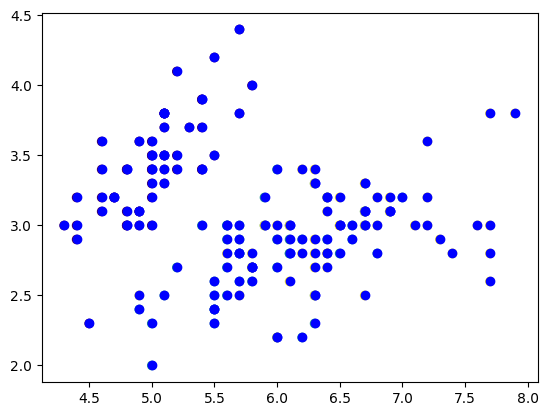

In [31]:
optimal_margin_classifier.plot_decision_boundary()

In [36]:
from typing import Tuple
import numpy as np


class KernelSupportVectorMachine:
    x: np.ndarray
    y: np.ndarray

    w: np.ndarray
    b: float

    support_vectors: np.ndarray
    alpha: np.ndarray
    sigma: float

    def __init__(self, x: np.ndarray, y: np.ndarray):
        self.x = x
        self.y = y

        self.w = np.zeros(x.shape[1])
        self.b = 1

        self.alpha = np.zeros(len(x))
        self.sigma = 1

    def learn(self, C: float, epochs: int = 20, learning_rate: float = 0.001):
        history = []
        for epoch in range(0, epochs):
            slack_sum: float = 0
            support_vectors: list[float] = []
            isCorrectClassification: list[bool] = []

            K = self.gaussian_kernel(self.x, self.x)
            for i in range(0, len(self.x)):
                geometric_margin = self.geometric_margin(self.w, self.b, self.x[i], self.y[i])

                if(geometric_margin >= 1):
                    support_vectors.append(self.x[i])
                isCorrectClassification.append(geometric_margin >= 1)

                slack_i = np.maximum(0, 1 - geometric_margin)
                slack_sum += slack_i

            dw = self.w - self.y[isCorrectClassification].dot(K[isCorrectClassification])
            self.w = self.w - learning_rate * dw

            db = - C * np.sum(self.y[isCorrectClassification])
            self.b = self.b - learning_rate * db

            loss: float = 0.5 * self.w.dot(self.w) ** C * slack_sum
            print(f"Epoch {epoch}: Loss: {loss}")
            history.append(f"Loss: {loss:.2f}, Wrong classified: {len(isCorrectClassification)}")
        print(history)

    def decision_function(self, x: np.ndarray):
        """
        :return: w * K(x, x) + b
        """
        return self.w.dot(self.gaussian_kernel(self.x, x)) + self.b

    def margin(self, x: np.ndarray) -> float:
        """
        :return: The geometric margin of the hyperplane: y * (w^T x + b) / ||w||
        """
        return self.y * self.decision_function(x)

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        :param x: Value to classify.
        :return: The label for the given value: sign(w^T x + b)
        """
        return np.sign(self.decision_function(x))

    def loss_function(self) -> float:
        """
        :return: loss: ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)
        """
        sum_alpha = 0
        second_sum = 0
        for i in range(0, len(self.x)):
            sum_alpha += self.alpha[i]
            for j in range(0, len(self.x)):
                second_sum += self.alpha[i] * self.alpha[j] * self.y[i] * self.y[j] * self.gaussian_kernel(self.x[i],
                                                                                                           self.x[j])
        return sum_alpha - (1 / 2) * second_sum

    def gaussian_kernel(self, x_i: np.ndarray, x_j: np.ndarray) -> float:
        """
        :param x_i: Data point i (row of x)
        :param x_j: Data point j (row of x)
        :return: Gaussian kernel applied to x_i and x_j: : exp(-||x_i - x_j||^2 / (2 * sigma^2))
        """
        return np.exp(-np.linalg.norm(x_i - x_j) ** 2 / (2 * self.sigma ** 2))

    @staticmethod
    def geometric_norm(w: np.ndarray):
        """
        :param w: Weight vector.
        :return Geometric norm: 1/2 ||w||^2
        """
        return 1 / 2 * np.linalg.norm(w) ** 2

    @staticmethod
    def geometric_margin(w: np.ndarray, b: float, x: np.ndarray, y: float) -> np.ndarray:
        """
        :param w: Weight vector.
        :param b: Bias.
        :param x: Data point.
        :param y: Label.
        :return: The geometric margin for a single data point: y * (w^T x + b) / ||w||
        """
        return y * (w.T @ x + b) / np.linalg.norm(w)

In [37]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

svm = KernelSupportVectorMachine(x, y)
svm.learn(epochs=400, learning_rate=0.001, C=1)

C:\Users\Oli\AppData\Local\Temp\ipykernel_6836\8575293.py:112: RuntimeWarning: invalid value encountered in scalar divide
  return y * (w.T @ x + b) / np.linalg.norm(w)
C:\Users\Oli\AppData\Local\Temp\ipykernel_6836\8575293.py:112: RuntimeWarning: divide by zero encountered in scalar divide
  return y * (w.T @ x + b) / np.linalg.norm(w)


IndexError: invalid index to scalar variable.